**What is Stroke ?**
<br>
It happens when the brain's blood vessels become narrowed or blocked, causing severely reduced blood flow (ischemia). Blocked or narrowed blood vessels are caused by fatty deposits that build up in blood vessels or by blood clots or other debris that travel through your bloodstream and lodge in the blood vessels in your brain.

Our goal here is to predict whether person will get stroke or no based on some features that we have
<br>
- 1) id: unique identifier
<br>
- 2) gender: "Male", "Female" or "Other"
<br>
- 3) age: age of the patient
<br>
- 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
<br>
- 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
<br>
- 6) ever_married: "No" or "Yes"
<br>
- 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
<br>
- 8) Residence_type: "Rural" or "Urban"
<br>
- 9) avg_glucose_level: average glucose level in blood
<br>
- 10) bmi: body mass index
<br>
- 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
<br>
- 12) stroke: 1 if the patient had a stroke or 0 if not
<br>
<br>
Note: "Unknown" in smoking_status means that the information is unavailable for this patient.

# Explatory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df  = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

We have 201 null values on bmi column, well I will replce these NAN values with the mean as we don't have much data and BMI don't change that much

In [ ]:
bmi_mean = df['bmi'].mean()
df['bmi'].fillna(value=bmi_mean, inplace=True)
bmi_mean

In [ ]:
df.isnull().sum().sum()

In [ ]:
# We don't need the id I will drop it
df.drop('id', axis=1, inplace=True)
df.head()

Now let's do some EDA to understand our data more

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(df['age'], bins=15);

In [ ]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["age"], color='green')
sns.distplot(df[df['stroke'] == 1]["age"], color='red')

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

it's very obious that people get strokes in elder ages

the age column is a little left skewed with a peak around 60s

In [ ]:
sns.countplot(x='gender', data=df, hue='stroke');

In [ ]:
df['gender'].value_counts()

is seems that there is only 1 value of other in gender column I will drop it

In [ ]:
df.drop(df.loc[df['gender']=='Other'].index, inplace=True)

In [ ]:
sns.countplot(x='gender', data=df, hue='stroke');

ok generally females are more than males we don't have much strokes in our data here that's a problem for the machine learning part as we don't need our model to overfit on non strokes

In [ ]:
sns.countplot(x='stroke', data=df)
df.stroke.value_counts()

Here is our main problem, if we trained our model on the current it will always assume that there is no strokes due that no strokes is much mroe than no strokes we will use upsampling technique

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="age", y="bmi", hue='gender', ci=None);

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="age", y="avg_glucose_level", hue='stroke', ci=None);

In [ ]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["bmi"], color='green')
sns.distplot(df[df['stroke'] == 1]["bmi"], color='red') 

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.avg_glucose_level, color="green", label="avg_glucose_level", kde= True)
plt.legend();

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='avg_glucose_level', y='bmi', hue='stroke', data=df);

We can assume here that strokes usually happens on higher glucose levels

In [ ]:
sns.countplot(x='smoking_status', data=df);

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(y='age', x='smoking_status',hue='stroke' ,data=df)

In [ ]:
sns.countplot(x='Residence_type', hue='stroke', data=df)

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(y='avg_glucose_level', x='heart_disease',hue='stroke' ,data=df)

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(y='age', x='heart_disease',hue='stroke' ,data=df)

In [ ]:
sns.countplot(x='work_type', hue='ever_married', data=df);

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(x='bmi', hue='ever_married', data=df, bins=50)

Well am not surprised that married people have higher bmi  (:

In [ ]:
sns.pairplot(df, size = 2.5)

In [ ]:
correlation = df.corr()
fig, axes = plt.subplots(figsize=(7, 7))
sns.heatmap(correlation, vmax=.8, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10});

We cannott tell much here as we didn't upsample the data yet

# Data Preprocessing

In [ ]:
X = df.iloc[:,0:-1].values
y = df.iloc[:, -1].values
# This will split the daa into target and values column with arrays shape

In [ ]:
X

In [ ]:
y

### Label Encoding

What is **One hot Encoding** ?
<br>
One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

I will use one hot encoder for teatures that aren't binary like zero and ones and I will use label encoding for categorical features that are binary features

In [ ]:
# with np.printoptions(threshold=np.inf):
#     print(X)
# # I used this to know the index of columns I want to convert as it's a numpy array and that normal one doesn't display the full data

In [ ]:
l_e = LabelEncoder()
X[:, 0] = l_e.fit_transform(X[:, 0]) # gender column
X[:, 4] = l_e.fit_transform(X[:, 4]) # ever_married column
X[:, 6] = l_e.fit_transform(X[:, 6]) # Residence_type column

In [ ]:
c_t = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [5,9])], remainder= 'passthrough')
X = np.array(c_t.fit_transform(X))
# I will use it one 'work_type', 'smoking_status'

In [ ]:
X

In [ ]:
X.shape, y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

### Scaling the Data

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information, the output will range from 0 to 1

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Upsampling the Data

What is **Upsampling** ?
<br>
Upsampling is a procedure where synthetically generated data points (corresponding to minority class) are injected into the dataset. After this process, the counts of both labels are almost the same. This equalization procedure prevents the model from inclining towards the majority class, We use this to prevent overfiting in machine learning as poeple had no strokes much more than people hadn't strokes

In [ ]:
print (sum(y_train == 1))
print (sum(y_train == 0))

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train.ravel())

In [ ]:
print (X_train.shape)
print (y_train.shape)
print (sum(y_train == 1))
print (sum(y_train == 0))

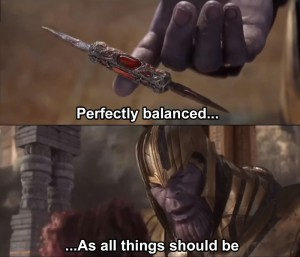

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

### 1- LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = cross_val_score(model, X_train, y_train, cv = 6)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print ('train score of LogisticRegression is', score.mean(),'%')
print ('--')
print ('Precision score is ', precision)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.figure(figsize = (8, 8))
plt.plot([0,1],[0,1],"k--",'r+')
figsize=(16,12)
plt.plot(fpr,tpr,color = '#b01717', label = 'AUC = %0.3f' % roc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" Logistic Regression ROC Curve")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Oranges', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

### 2 - Support Vector Machine

In [ ]:
model = SVC(probability=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = cross_val_score(model, X_train, y_train, cv = 6)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print ('train score of SVC is', score.mean(),'%')
print ('--')
print ('Precision score is ', precision)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:,1]
# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.figure(figsize = (8, 8))
plt.plot([0,1],[0,1],"k--",'r+')
figsize=(16,12)
plt.plot(fpr,tpr,color = '#b01717', label = 'AUC = %0.3f' % roc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" SVC ROC Curve")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Oranges', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

### 3 - KNeighbors

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = cross_val_score(model, X_train, y_train, cv = 6)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print ('train score of SVC is', score.mean(),'%')
print ('--')
print ('Precision score is ', precision)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:,1]
# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.figure(figsize = (8, 8))
plt.plot([0,1],[0,1],"k--",'r+')
figsize=(16,12)
plt.plot(fpr,tpr,color = '#b01717', label = 'AUC = %0.3f' % roc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" KNeighbors ROC Curve")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Oranges', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

### 4 - Random Forest  

In [ ]:
model =  RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = cross_val_score(model, X_train, y_train, cv = 6)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print ('train score of SVC is', score.mean(),'%')
print ('--')
print ('Precision score is ', precision)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:,1]
# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.figure(figsize = (8, 8))
plt.plot([0,1],[0,1],"k--",'r+')
figsize=(16,12)
plt.plot(fpr,tpr,color = '#b01717', label = 'AUC = %0.3f' % roc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" Random Forest ROC Curve")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Oranges', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Hyperparameters Tuning

I will use **GridSearchCV** to find the best hyperparameters
<br>
So what is it ?
<br>
cv: number of cross-validation you have to try for each selected set of hyperparameters. verbose: you can set it to 1 to get the detailed print out while you fit the data to GridSearchCV
<br>
in the end, you can select the best parameters from the listed hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [ ]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.025,0.05]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, scoring = 'accuracy',cv = 6)
grid_log_reg.fit(X_train, y_train)
best_score = grid_log_reg.best_score_
best_params = grid_log_reg.best_params_
print ('Best Score is',best_score * 100)
print ('Best Parameters is', best_params)

### Support Vector Machine

In [ ]:
svc_params = {'C':[0.5,0.75,1, 1.5],'kernel':['linear', 'rbf']}
svc_clf = GridSearchCV(SVC(), svc_params, scoring = 'accuracy',cv = 6)
svc_clf.fit(X_train, y_train)
best_score = svc_clf.best_score_
best_params = svc_clf.best_params_
print ('Best Score is',best_score * 100)
print ('Best Parameters is', best_params)

### KNeighbors

In [ ]:
kn_params = {'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
kn = GridSearchCV(KNeighborsClassifier(), kn_params, scoring = 'accuracy',cv = 6)
kn.fit(X_train, y_train)
best_score = kn.best_score_
best_params = kn.best_params_
print ('Best Score is',best_score * 100)
print ('Best Parameters is', best_params)

### Random Forest

In [ ]:
rf_params = {'n_estimators':[100,150,200],'criterion':['gini','entropy'],}
rf = GridSearchCV(RandomForestClassifier(), rf_params, scoring = 'accuracy',cv = 6)
rf.fit(X_train, y_train)
best_score = rf.best_score_
best_params = rf.best_params_
print ('Best Score is',best_score * 100)
print ('Best Parameters is', best_params)

Now Let's apply the highest accuracy model with best hyperparameters

In [ ]:
model =  RandomForestClassifier(n_estimators=200, criterion='entropy' )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = cross_val_score(model, X_train, y_train, cv = 10)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print ('train score of SVC is', score.mean(),'%')
print ('--')
print ('Precision score is ', precision)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:,1]
# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.figure(figsize = (8, 8))
plt.plot([0,1],[0,1],"k--",'r+')
figsize=(16,12)
plt.plot(fpr,tpr,color = '#b01717', label = 'AUC = %0.3f' % roc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" SVC ROC Curve")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Oranges', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

I hope you learned anything from this notebook, Thank You